In [ ]:
close all; clear all; N=1000; a=0; b=0.7; c=0; d=-0.0001; e=1;
y=randn(N,1)*15; % true ages, demeaned
x=a+ + b*y + c*y.^2 + d*y.^3; % simulate noiseless but biased predictions x
x=x+randn(N,1)*e; % add errors into the age prediction x, like would naturally happen in practice
grot = pinv([ones(size(y)) y y.^2 y.^3])*x ;  % estimate the debiasing parameters
a_est=grot(1)  % you can see these are v close to what they should be
b_est=grot(2)
c_est=grot(3)
d_est=grot(4)
Y=min(y):0.1:max(y); X=a_est + b_est*Y + c_est*Y.^2 + d_est*Y.^3; x_debiased=x;
for i=1:length(x)
  j=find( abs(x(i)-X) == min(abs(x(i)-X) ) ); j=j(1);
  x_debiased(i)=Y(j);
end
figure; subplot(1,2,1); dscatter(y,x); hold on; plot([-50 50],[-50 50],'k');
subplot(1,2,2); dscatter(y,x_debiased); hold on; plot([-50 50],[-50 50],'k');
mean(abs([ x-y x_debiased-y ]))

In [317]:
import os
import pickle
from glob import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [318]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [319]:
test_path = '../../predictions/AM0-27_predictions/output_statistics_test.csv'
# test_path = '../../predictions/AM0-45_predictions/output_statistics_test.csv'
test = pd.read_csv(test_path)
x = test.output_age.to_numpy()
y = test.target_age.to_numpy()

3.2725359562441896


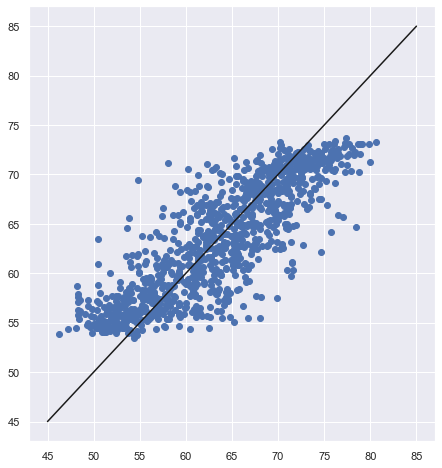

In [320]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.scatter(y,x)
plt.plot([45,85],[45,85],'k')
print(np.mean(np.abs(x-y)))

In [304]:
# N=1000; a=0; b=0.7; c=0; d=-0.0001; e=5;
# y=np.random.randn(N,1)*15; # true ages, demeaned
# x= a + b*y + c*y**2 + d*y**3; # simulate noiseless but biased predictions x
# x=x+np.random.randn(N,1)*e; # add errors into the age prediction x, like would naturally happen in practice

In [305]:
# grot = np.dot(np.linalg.pinv([y.flatten()**3, y.flatten()**2, y.flatten(), np.ones(len(y))]).T,x);  # estimate the debiasing parameters
# a_est=grot[3]  # you can see these are v close to what they should be
# b_est=grot[2]
# c_est=grot[1]
# d_est=grot[0]

# step=0.1
# extrap = 0
# minY = y.min()-extrap
# maxY = y.max()+extrap
# steps = int((y.max() - y.min()) / step + 1)
# Y = np.linspace(minY, maxY, steps)
# X = a_est + b_est*Y + c_est*Y**2 + d_est*Y**3
# x_debiased = np.copy(x)
# for i in range(len(x)):
#     j = np.where( np.abs(x[i]-X) == np.min(np.abs(x[i]-X)) )
#     j = j[0]
#     x_debiased[i] = Y[j]

grot = np.dot(np.linalg.pinv([y.flatten()**2, y.flatten(), np.ones(len(y))]).T,x);  # estimate the debiasing parameters
a_est=grot[2]  # you can see these are v close to what they should be
b_est=grot[1]
c_est=grot[0]
step=0.1
extrap = 50
minY = y.min()-extrap
maxY = y.max()+extrap
steps = int((y.max() - y.min()) / step + 1)
Y = np.linspace(minY, maxY, steps)
X = a_est + b_est*Y + c_est*Y**2
x_debiased = np.copy(x)
for i in range(len(x)):
    j = np.where( np.abs(x[i]-X) == np.min(np.abs(x[i]-X)) )
    j = j[0]
    x_debiased[i] = Y[j]


3.2725359562441896
3.8015428720376576


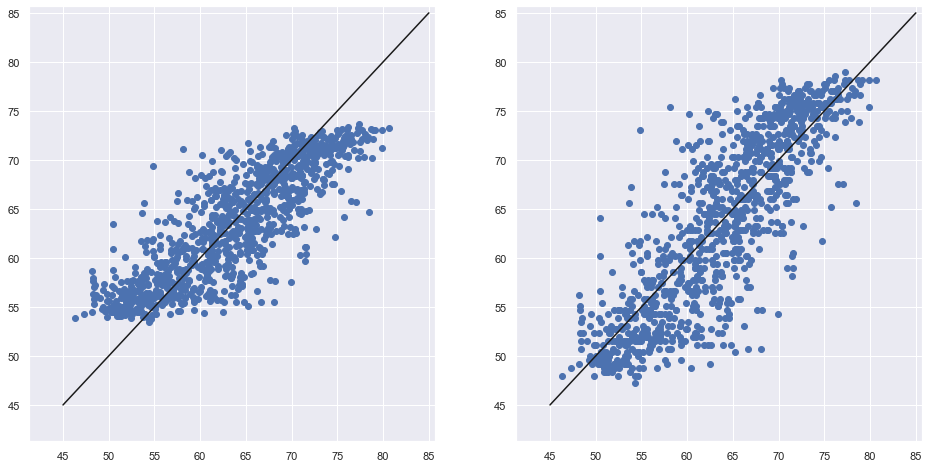

In [306]:
x_min, x_max = np.min(x), np.max(x)
x2_min, x2_max = np.min(x_debiased), np.max(x_debiased)
y_min, y_max = np.min(y), np.max(y)
c_min, c_max = min(x_min, y_min, x2_min), max(x_max, y_max, x2_max)

plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.scatter(y,x)
# plt.plot([-50,50],[-50,50],'k')
plt.plot([45,85],[45,85],'k')
plt.xlim([c_min-5, c_max+5])
plt.ylim([c_min-5, c_max+5])

plt.subplot(1,2,2)
plt.scatter(y, x_debiased)
# plt.plot([-50,50],[-50,50],'k')
plt.plot([45,85],[45,85],'k')
plt.xlim([c_min-5, c_max+5])
plt.ylim([c_min-5, c_max+5])
# plt.plot(X, Y, 'r')

print(np.mean(np.abs(x-y)))
print(np.mean(np.abs(x_debiased-y)))

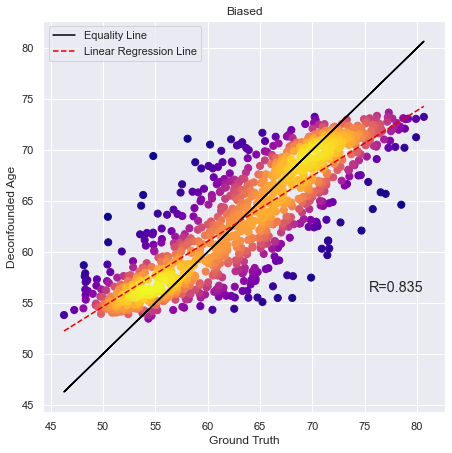

In [307]:
scatter_plot_heatmap(y, x, 'Ground Truth', 'Deconfounded Age', title='Biased', 
                     equality_line=True, set_scale=True)

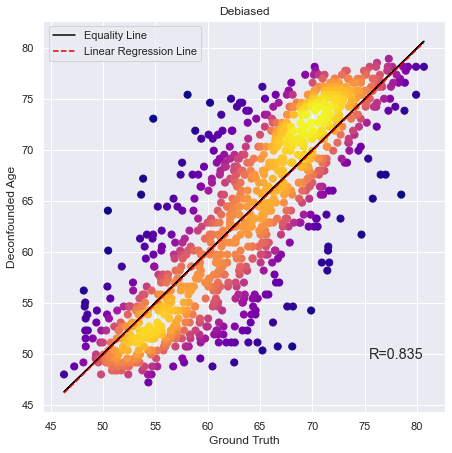

In [308]:
scatter_plot_heatmap(y, x_debiased, 'Ground Truth', 'Deconfounded Age', title='Debiased', 
                     equality_line=True, set_scale=True)

In [309]:
test['age_delta_decon'] = test.target_age - x_debiased

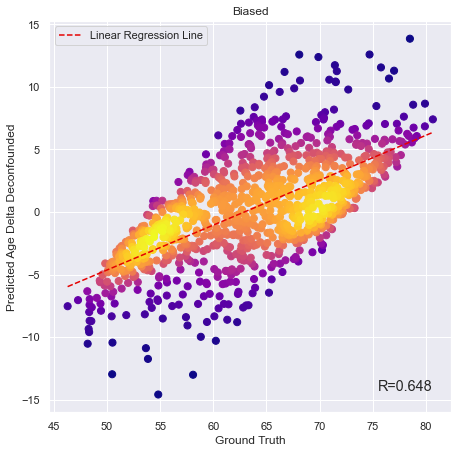

In [310]:
scatter_plot_heatmap(x=test.target_age, y=test.age_delta, 
                               xlabel='Ground Truth', ylabel='Predicted Age Delta Deconfounded',
                               equality_line=False, title='Biased')

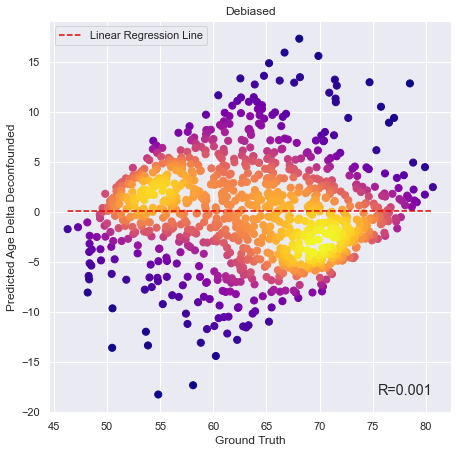

In [311]:
scatter_plot_heatmap(x=test.target_age, y=test.age_delta_decon, 
                               xlabel='Ground Truth', ylabel='Predicted Age Delta Deconfounded',
                               equality_line=False, title='Debiased')

Text(0.5, 1.0, 'Deconfounded - no extrap')

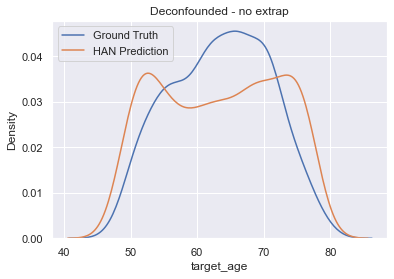

In [313]:
plt.figure()
sns.kdeplot(test.target_age, label='Ground Truth')
# sns.kdeplot(T1_nonlinear.output_age_decon, label='HGL Prediction')
sns.kdeplot(x_debiased, label='HAN Prediction')
plt.legend()
plt.title("Deconfounded - no extrap")

In [161]:
def age_deconfounding(ages, age_deltas):
    
    ages = ages.to_numpy()
    age_deltas = age_deltas.to_numpy()
    
    ones = np.ones(len(ages))
    ages_squared = np.square(ages)
    age_confounds = np.array([ones, ages, ages_squared])
    
    age_deltas = np.reshape(age_deltas, (len(age_deltas), 1) )
    beta = np.dot( np.linalg.pinv(age_confounds.T), age_deltas )
    corrected_age_deltas = age_deltas.T - np.dot(beta.T, age_confounds)
    return corrected_age_deltas[0]

def age_deconfounding2(predicted_ages, chronological_ages):
    
    predicted_ages = predicted_ages.to_numpy()
    chronological_ages = chronological_ages.to_numpy()
    
    ones = np.ones(len(chronological_ages))
    chronological_ages_squared = np.square(chronological_ages)
#     chronological_ages_confounds = np.array([ones, chronological_ages, chronological_ages_squared])
    chronological_ages_confounds = np.array([ones, chronological_ages])
    
    ones_predicted = np.ones(len(predicted_ages))
    predicted_ages_squared = np.square(predicted_ages)
#     predicted_ages_confounds = np.array([ones_predicted, predicted_ages, predicted_ages_squared])
    predicted_ages_confounds = np.array([ones_predicted, predicted_ages])
    
    predicted_ages = np.reshape(predicted_ages, (len(predicted_ages), 1) )
    beta = np.dot( np.linalg.pinv(chronological_ages_confounds.T), predicted_ages )
        
#     print(beta)
        
#     corrected_predicted_ages = predicted_ages.T - np.dot(beta.T, predicted_ages_confounds)
#     corrected_predicted_ages = predicted_ages.T - np.dot(beta.T, chronological_ages_confounds)

#     corrected_predicted_ages = np.dot(beta.T, predicted_ages_confounds)
    corrected_predicted_ages = (predicted_ages.flatten() - beta[0])/beta[1]
    
    return corrected_predicted_ages

from scipy.stats import pearsonr
from scipy.stats import gaussian_kde
def scatter_plot_heatmap(x, y, xlabel, ylabel, title, equality_line=True, set_scale=False,
                        ):
#                         X=0, Y=0):
#                          *args):
    
#     x = x.to_numpy()
#     y = y.to_numpy()

#     print(args)
    
    fig = plt.figure(figsize=[7.2, 7.2])
    sns.set_style("darkgrid", {'image.cmap': u'plasma'})
    xy = np.vstack([x,y])
    z = gaussian_kde(xy)(xy)
    # Sort the points by density, so that the densest points are plotted last
    idx = z.argsort()
    x, y, z = x[idx], y[idx], z[idx]
    plt.scatter(x,y,c=z,s=50)
    if equality_line == True:
        plt.plot(x, x, ls="-", color = sns.xkcd_rgb['black'], label='Equality Line') #this is just the line of equality
    
    X_mat=np.vstack((np.ones(len(x)), x)).T
    beta_hat = np.linalg.inv(X_mat.T.dot(X_mat)).dot(X_mat.T).dot(y)
    b,w = beta_hat[0],beta_hat[1]
    x2 = np.linspace(np.min(x),np.max(x),num=10)
    y2 = w * x2 + b
    plt.plot(x2,y2,ls='--', color= sns.xkcd_rgb['red'], label='Linear Regression Line')
    
    pearson_correlation = pearsonr(x,y)[0]
    plt.text(np.max(x), np.min(y)+0.05*np.abs(np.min(y2)), 'R='+str(round(pearson_correlation,3)), horizontalalignment='right', fontsize='large')
    
    if set_scale == True:
        x_min, x_max = np.min(x), np.max(x)
        y_min, y_max = np.min(y), np.max(y)
        c_min, c_max = min(x_min, y_min), max(x_max, y_max)
        plt.xlim([c_min-2, c_max+2])
        plt.ylim([c_min-2, c_max+2])
    
#     if X!=0 and Y!=0:
#         plt.plot(X, Y, 'r')
    
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
#     plt.colorbar()
    plt.show()

In [322]:
from scipy.optimize import minimize

3.2725359562441896


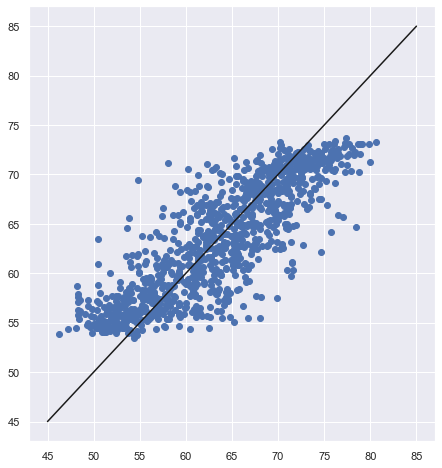

In [353]:
test_path = '../../predictions/AM0-27_predictions/output_statistics_test.csv'
# test_path = '../../predictions/AM0-45_predictions/output_statistics_test.csv'
test = pd.read_csv(test_path)
x = test.output_age.to_numpy()
y = test.target_age.to_numpy()
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.scatter(y,x)
plt.plot([45,85],[45,85],'k')
print(np.mean(np.abs(x-y)))

[[-9.79191681e-05]
 [-1.23293711e-05]
 [ 6.98981139e-01]
 [-2.84693870e-02]]
[-2.31913065e+01 -2.30913065e+01 -2.29913065e+01 -2.28913065e+01
 -2.27913065e+01 -2.26913065e+01 -2.25913065e+01 -2.24913065e+01
 -2.23913065e+01 -2.22913065e+01 -2.21913065e+01 -2.20913065e+01
 -2.19913065e+01 -2.18913065e+01 -2.17913065e+01 -2.16913065e+01
 -2.15913065e+01 -2.14913065e+01 -2.13913065e+01 -2.12913065e+01
 -2.11913065e+01 -2.10913065e+01 -2.09913065e+01 -2.08913065e+01
 -2.07913065e+01 -2.06913065e+01 -2.05913065e+01 -2.04913065e+01
 -2.03913065e+01 -2.02913065e+01 -2.01913065e+01 -2.00913065e+01
 -1.99913065e+01 -1.98913065e+01 -1.97913065e+01 -1.96913065e+01
 -1.95913065e+01 -1.94913065e+01 -1.93913065e+01 -1.92913065e+01
 -1.91913065e+01 -1.90913065e+01 -1.89913065e+01 -1.88913065e+01
 -1.87913065e+01 -1.86913065e+01 -1.85913065e+01 -1.84913065e+01
 -1.83913065e+01 -1.82913065e+01 -1.81913065e+01 -1.80913065e+01
 -1.79913065e+01 -1.78913065e+01 -1.77913065e+01 -1.76913065e+01
 -1.75913065e

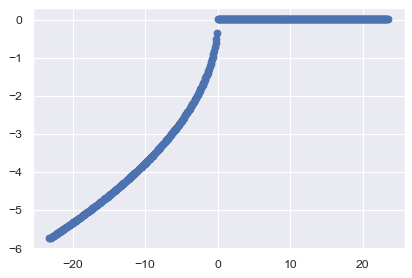

In [390]:

# https://moonbooks.org/Articles/How-to-numerically-compute-the-inverse-function-in-python-using-scipy-/

# x = test.output_age.to_numpy()
# y = test.target_age.to_numpy()

N=1000; a=0; b=0.7; c=0; d=-0.0001; e=1;
y=np.random.randn(N,1)*15; # true ages, demeaned
x= a + b*y + c*y**2 + d*y**3; # simulate noiseless but biased predictions x
x=x+np.random.randn(N,1)*e; # add errors into the age prediction x, like would naturally happen in practice

grot = np.dot(np.linalg.pinv([y.flatten()**3, y.flatten()**2, y.flatten(), np.ones(len(y))]).T,x);  # estimate the debiasing parameters
a_est=grot[3]  # you can see these are v close to what they should be
b_est=grot[2]
c_est=grot[1]
d_est=grot[0]

print(grot)

def function(y, a, b, c, d):
    x = a + b*y + c*y**2 + d*y**3
    return x

def diff(y, a, b, c, d, fact):
    xt = function(y, a, b, c, d)
#     print(fact)
    return (xt - fact)**2

x2 = np.arange(np.min(x),np.max(x),0.1)
print(x2)
y2 = np.zeros(x2.shape)
for idx,x_value in enumerate(x2):
    res = minimize(diff, 0, args=(x_value, a_est, b_est, c_est, d_est), method='Nelder-Mead', tol=1e-6)
    y2[idx] = res.x[0]

# y2 = function(y, a_est, b_est, c_est, d_est)
    
fig = plt.figure(num=None, dpi=80, facecolor='w', edgecolor='k')
# plt.scatter(y, x)
plt.scatter(x2, y2)

# step=0.1
# extrap = 0
# minY = y.min()-extrap
# maxY = y.max()+extrap
# steps = int((y.max() - y.min()) / step + 1)
# Y = np.linspace(minY, maxY, steps)
# X = a_est + b_est*Y + c_est*Y**2 + d_est*Y**3
# x_debiased = np.copy(x)
# for i in range(len(x)):
#     j = np.where( np.abs(x[i]-X) == np.min(np.abs(x[i]-X)) )
#     j = j[0]
#     x_debiased[i] = Y[j]
    
# plt.scatter(y, x_debiased)

In [349]:
len(y)

1000